# Working with standardized classes tutorial

This tutorial goes over the basics of how to read, and inspect the standardized data sets

The data sets with standrdized classes can be either generated from the original data sets at __[Soundscapes Archive](https://www.higp.hawaii.edu/archive/isla/UH_Soundscapes/)__ using the data_standardizaton.py script, or dowloaded from the HiClass directory on the same site.

## Section 0: Prerequisites and Imports
The following cell includes the imports necessary to run this example.

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from quantum_inferno.plot_templates.plot_templates_examples import plot_wf_mesh_vert_example
from quantum_inferno.cwt_atoms import cwt_chirp_from_sig

## Section 1: Loading the Dataset

In the following cell, we'll define the path to the dataset, which you've either dowloaded or created from the original data.

In [ ]:
TUTORIAL_PICKLE_FILE_NAME = "merged_standardized_dataset_tutorial.pkl"
CURRENT_DIRECTORY = os.getcwd()
PATH_TO_TUTORIAL_PKL = os.path.join(CURRENT_DIRECTORY, TUTORIAL_PICKLE_FILE_NAME)
PATH_TO_PKL = PATH_TO_TUTORIAL_PKL
# PATH_TO_PKL = "<insert path to SHAReD.pkl on your device here>"

Once we have the location of the file, we can read the data using the pandas module.

In [18]:
shared_ds = pd.read_pickle(PATH_TO_PKL)
shared_ds

,event_name,source_yield_kg,smartphone_id,microphone_time_s,microphone_data,microphone_sample_rate_hz,barometer_time_s,barometer_data,barometer_sample_rate_hz,accelerometer_time_s,...,external_location_longitude,source_latitude,source_longitude,distance_from_explosion_m,scaled_distance,explosion_detonation_time,internal_clock_offset_s,smartphone_model,effective_yield_category,training_validation_test
176,INL_20200810_03,18.0,1637681008,"[1597095575.619938, 1597095575.6200628, 159709...","[-0.00021350386668927968, -0.00024402144481427...",8000.0,"[1597095575.611225, 1597095575.6507285, 159709...","[85.22748565673828, 85.22782897949219, 85.2280...",30.007294,"[1597095575.6189249, 1597095575.621978, 159709...",...,-112.67223,43.694175,-112.696747,2031.561205,615.265283,1.597096e+09,3.032045,Galaxy S08,10.0,26


Each row of the pandas DataFrame contains all data and metadata from a single station for a single event, with individual columns for each of the available fields.

To keep track of all the column names, we'll define the 'SHAReDLabels' class, and then initiate an instance of it in the next cell.

In [19]:
class SHAReDLabels:
    """
    A class containing the column names used in the SHAReD dataset.
    """
    def __init__(self):
        self.event_name: str = "event_name"
        self.source_yield_kg: str = "source_yield_kg"
        self.smartphone_id: str = "smartphone_id"
        self.microphone_time_s: str = "microphone_time_s"
        self.microphone_data: str = "microphone_data"
        self.microphone_sample_rate_hz: str = "microphone_sample_rate_hz"
        self.barometer_time_s: str = "barometer_time_s"
        self.barometer_data: str = "barometer_data"
        self.barometer_sample_rate_hz: str = "barometer_sample_rate_hz"
        self.accelerometer_time_s: str = "accelerometer_time_s"
        self.accelerometer_data_x: str = "accelerometer_data_x"
        self.accelerometer_data_y: str = "accelerometer_data_y"
        self.accelerometer_data_z: str = "accelerometer_data_z"
        self.accelerometer_sample_rate_hz: str = "accelerometer_sample_rate_hz"
        self.ambient_microphone_time_s: str = "ambient_microphone_time_s"
        self.ambient_microphone_data: str = "ambient_microphone_data"
        self.ambient_barometer_time_s: str = "ambient_barometer_time_s"
        self.ambient_barometer_data: str = "ambient_barometer_data"
        self.ambient_accelerometer_time_s: str = "ambient_accelerometer_time_s"
        self.ambient_accelerometer_data_x: str = "ambient_accelerometer_data_x"
        self.ambient_accelerometer_data_y: str = "ambient_accelerometer_data_y"
        self.ambient_accelerometer_data_z: str = "ambient_accelerometer_data_z"
        self.internal_location_latitude: str = "internal_location_latitude"
        self.internal_location_longitude: str = "internal_location_longitude"
        self.external_location_latitude: str = "external_location_latitude"
        self.external_location_longitude: str = "external_location_longitude"
        self.source_latitude: str = "source_latitude"
        self.source_longitude: str = "source_longitude"
        self.distance_from_explosion_m: str = "distance_from_explosion_m"
        self.scaled_distance: str = "scaled_distance"
        self.explosion_detonation_time: str = "explosion_detonation_time"
        self.internal_clock_offset_s: str = "internal_clock_offset_s"
        self.smartphone_model: str = "smartphone_model"
        self.effective_yield_category: str = "effective_yield_category"
        self.event_id_number: str = "training_validation_test"

In [20]:
ds_labels = SHAReDLabels()

With the labels now easily accessible, we'll print out some metadata about the recording(s) in our dataset.

Notice how the desired field (in this case: "event_id_number") is accessed using the column names stored in `ds_labels`.

In [21]:
n_signals = len(shared_ds)
event_ids, counts = np.unique(shared_ds[ds_labels.event_id_number], return_counts=True)
n_events = len(event_ids)
print(f"This dataset contains {n_signals} recording(s) from {n_events} unique high explosive event(s).\n")

This dataset contains 1 recording(s) from 1 unique high explosive event(s).



Each of the rows in the pandas DataFrame contains all the data collected by a single smartphone during/before a single event and associated metadata. Available fields are listed in the SHAReDLabels class documentation.

We can also loop through each event in the dataset and print out the metadata associated with individual explosions.

In [22]:
print(f"All events in PKL file loaded from: {PATH_TO_PKL}")
for event_id, count in zip(event_ids, counts):
    event_df = shared_ds[shared_ds[ds_labels.event_id_number] == event_id]
    eq_yield = event_df[ds_labels.source_yield_kg][event_df.index[0]]
    print(f"\tEvent {event_id}: {eq_yield} kg TNT eq. yield, {count} recording(s)")

All events in PKL file loaded from: /Users/tyler/IdeaProjects/UH_Soundscapes/notebooks/SHAReD_tutorial.pkl
	Event 26: 18.0 kg TNT eq. yield, 1 recording(s)


## Section 2: Filtering the Dataset

The dataset can be filtered easily using any of the included fields. For example, you could select a subset containing only data recorded from explosions with TNT equivalent yields larger than 20 kg using this line of code:

```python
subset_df = shared_ds[shared_ds[ds_labels.source_yield_kg] >= 20.]]
```

For the tutorial, we've selected a subset of the dataset containing only the data from a single event recorded by a single smartphone.

To filter by event, event ID numbers ('event_id_number' in SHAReDLabels) must be used as the event ID numbers are unique integers.

In [23]:
example_event_id: int = 26
example_df = shared_ds[shared_ds[ds_labels.event_id_number] == example_event_id]
example_df

,event_name,source_yield_kg,smartphone_id,microphone_time_s,microphone_data,microphone_sample_rate_hz,barometer_time_s,barometer_data,barometer_sample_rate_hz,accelerometer_time_s,...,external_location_longitude,source_latitude,source_longitude,distance_from_explosion_m,scaled_distance,explosion_detonation_time,internal_clock_offset_s,smartphone_model,effective_yield_category,training_validation_test
176,INL_20200810_03,18.0,1637681008,"[1597095575.619938, 1597095575.6200628, 159709...","[-0.00021350386668927968, -0.00024402144481427...",8000.0,"[1597095575.611225, 1597095575.6507285, 159709...","[85.22748565673828, 85.22782897949219, 85.2280...",30.007294,"[1597095575.6189249, 1597095575.621978, 159709...",...,-112.67223,43.694175,-112.696747,2031.561205,615.265283,1.597096e+09,3.032045,Galaxy S08,10.0,26


Each event also has an associated event name ('event_name' in SHAReDLabels). Event names are strings contianing some metadata about the event. They are not necessarily unique to an event, however, and thus cannot be used to filter for a specific event.

All the events in SHAReD were recorded in collaboration with either Idaho National Laboratory (INL) or Nevada National Security Site (NNSS). Each event name starts contains ID strings starting with either "INL" (for events recorded in collaboration with INL) or "NNSS" (for events recorded in collaboration with NNSS). INL events contain information on the TNT equivalent source yield of the explosion, while NNSS events do not. All NNSS events share the same event name ("NNSS"), but can be differentiated by their unique event ID numbers.

Our example event is an INL event, so we can print out the source yield along with some other metadata.

In [24]:
event_name = example_df[ds_labels.event_name][example_df.index[0]]
print(f"\nExample event name: {event_name}, event ID number: {example_event_id}")
source_yield = example_df[ds_labels.source_yield_kg][example_df.index[0]]
smartphone_id = example_df[ds_labels.smartphone_id][example_df.index[0]]
dist_m = example_df[ds_labels.distance_from_explosion_m][example_df.index[0]]
print(f"{source_yield} kg TNT eq. detonation recorded by station {smartphone_id} at {round(dist_m)}m range.")


Example event name: INL_20200810_03, event ID number: 26
18.0 kg TNT eq. detonation recorded by station 1637681008 at 2032m range.


## Section 3: Plotting SHAReD Data

In the following cell, we'll define a function to plot all available data from a single station. Read through the comments in the function for a detailed explanation of each step.

In [25]:
# a colorblind-friendly color cycle to use in our plots
CBF_COLOR_CYCLE = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
# fontsize to use in plots
fontsize = 12

def demean_norm(signal: np.ndarray) -> np.ndarray:
    signal = signal - np.nanmean(signal)
    return signal / np.nanmax(np.abs(signal))

def multimodal_time_domain_plot(station_df, ds_labels):
    station_idx = station_df.index[0]
    event_name = station_df[ds_labels.event_name][station_idx]
    event_id = station_df[ds_labels.event_id_number][station_idx]
    station_id = station_df[ds_labels.smartphone_id][station_idx]
    print(f"\nEvent name: {event_name}, event ID number: {event_id}, station ID: {station_id}")
    source_yield = station_df[ds_labels.source_yield_kg][station_idx]
    if source_yield is None or np.isnan(source_yield):
        title_header = f"SHAReD event {event_name} (source yield not included)"
    else:
        title_header = f"SHAReD event {event_name} ({source_yield} kg TNT eq.)"
    # We'll plot the data from each sensor for both the "explosion" and "ambient" segments of data.
    t000 = station_df[ds_labels.explosion_detonation_time][station_idx]
    t00 = station_df[ds_labels.microphone_time_s][station_idx][0] - t000
    dt0 = station_df[ds_labels.microphone_time_s][station_idx][-1] - t000
    dist_m = station_df[ds_labels.distance_from_explosion_m][station_idx]

    title_line2 = f"\nDistance from source: {int(dist_m)} m, "
    title_line2 += f"scaled distance: {station_df[ds_labels.scaled_distance][station_idx]:.2f} m/kg^(1/3)"
    fig, ax = plt.subplots(3, 2, figsize=(10, 7), sharex='col', sharey=True)
    fig.suptitle(f"Normalized signals from {title_header}{title_line2}", fontsize=fontsize + 2)
    ax[0, 1].plot(station_df[ds_labels.microphone_time_s][station_idx] - t000,
                  demean_norm(station_df[ds_labels.microphone_data][station_idx]),
                  lw=1, color="k")
    ax[1, 1].plot(station_df[ds_labels.barometer_time_s][station_idx] - t000,
                  demean_norm(station_df[ds_labels.barometer_data][station_idx]),
                  lw=1, color="k")
    ax[2, 1].plot(station_df[ds_labels.accelerometer_time_s][station_idx] - t000,
                  demean_norm(station_df[ds_labels.accelerometer_data_x][station_idx]),
                  lw=1, label="x-axis", color=CBF_COLOR_CYCLE[0])
    ax[2, 1].plot(station_df[ds_labels.accelerometer_time_s][station_idx] - t000,
                  demean_norm(station_df[ds_labels.accelerometer_data_y][station_idx]),
                  lw=1, label="y-axis", color=CBF_COLOR_CYCLE[1])
    ax[2, 1].plot(station_df[ds_labels.accelerometer_time_s][station_idx] - t000,
                  demean_norm(station_df[ds_labels.accelerometer_data_z][station_idx]),
                  lw=1, label="z-axis", color=CBF_COLOR_CYCLE[2])
    
    ax[2, 1].legend()
    ax[0, 1].set(xlim=(t00, dt0), ylim=(-1.1, 1.1))
    ax[0, 1].tick_params(axis="y", labelsize="large", left=True, labelleft=True)
    ax[0, 1].set_title(f"Explosion microphone", fontsize=fontsize)
    ax[0, 1].set_ylabel("Norm", fontsize=fontsize)
    ax[1, 1].set_title("Explosion barometer", fontsize=fontsize)
    ax[1, 1].tick_params(axis="y", labelsize="large", left=True, labelleft=True)
    ax[1, 1].set_ylabel("Norm", fontsize=fontsize)
    ax[2, 1].set_title("Explosion accelerometer", fontsize=fontsize)
    ax[2, 1].tick_params(axis="y", labelsize="large", left=True, labelleft=True)
    ax[2, 1].tick_params(axis="x", which="both", bottom=True, labelbottom=True, labelsize="large")
    ax[2, 1].set_ylabel("Norm", fontsize=fontsize)
    ax[2, 1].set_xlabel("Time (s) since event", fontsize=fontsize)

    t10 = station_df[ds_labels.ambient_microphone_time_s][station_idx][0]
    dt1 = station_df[ds_labels.ambient_microphone_time_s][station_idx][-1] - t10
    ax[0, 0].plot(station_df[ds_labels.ambient_microphone_time_s][station_idx] - t10,
                  demean_norm(station_df[ds_labels.ambient_microphone_data][station_idx]),
                  lw=1, color="k")
    ax[1, 0].plot(station_df[ds_labels.ambient_barometer_time_s][station_idx] - t10,
                  demean_norm(station_df[ds_labels.ambient_barometer_data][station_idx]),
                  lw=1, color="k")
    ax[2, 0].plot(station_df[ds_labels.ambient_accelerometer_time_s][station_idx] - t10,
                  demean_norm(station_df[ds_labels.ambient_accelerometer_data_x][station_idx]),
                  lw=1, label="x-axis", color=CBF_COLOR_CYCLE[0])
    ax[2, 0].plot(station_df[ds_labels.ambient_accelerometer_time_s][station_idx] - t10,
                  demean_norm(station_df[ds_labels.ambient_accelerometer_data_y][station_idx]),
                  lw=1, label="y-axis", color=CBF_COLOR_CYCLE[1])
    ax[2, 0].plot(station_df[ds_labels.ambient_accelerometer_time_s][station_idx] - t10,
                  demean_norm(station_df[ds_labels.ambient_accelerometer_data_z][station_idx]),
                  lw=1, label="z-axis", color=CBF_COLOR_CYCLE[2])

    ax[0, 0].set(xlim=(0, dt1), ylim=(-1.1, 1.1))
    ax[0, 0].tick_params(axis="y", labelsize="large", left=True, labelleft=True)
    ax[0, 0].set_title(f"Ambient microphone", fontsize=fontsize)
    ax[0, 0].set_ylabel("Norm", fontsize=fontsize)
    ax[1, 0].set_title("Ambient barometer", fontsize=fontsize)
    ax[1, 0].tick_params(axis="y", labelsize="large", left=True, labelleft=True)
    ax[1, 0].set_ylabel("Norm", fontsize=fontsize)
    ax[2, 0].set_title("Ambient accelerometer", fontsize=fontsize)
    ax[2, 0].tick_params(axis="y", labelsize="large", left=True, labelleft=True)
    ax[2, 0].tick_params(axis="x", which="both", bottom=True, labelbottom=True, labelsize="large")
    ax[2, 0].set_ylabel("Norm", fontsize=fontsize)
    ax[2, 0].set_xlabel("Time (s)", fontsize=fontsize)

    plt.subplots_adjust(hspace=0.3)

In the tutorial PKL file, only the data from one station are included, but we'll loop through the indices anyway to illustrate how to generate the plots for all stations associated with an event.


Event name: INL_20200810_03, event ID number: 26, station ID: 1637681008


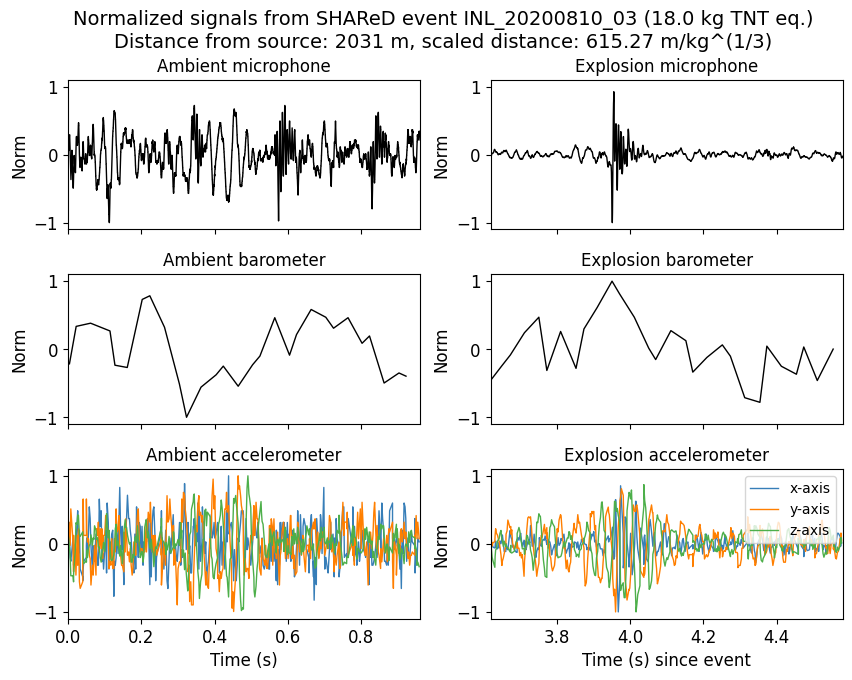

In [26]:
example_df = example_df.sort_values(by=ds_labels.distance_from_explosion_m)
event_stations = example_df[ds_labels.smartphone_id]
for station_id in event_stations:
    example_station_df = example_df[example_df[ds_labels.smartphone_id] == station_id]
    multimodal_time_domain_plot(station_df=example_station_df, ds_labels=ds_labels)

We can also generate time-frequency representations of the data. In the next cell, we'll use the audio data from our example file to illustrate how to do this quickly and easily using functions from the quantum_inferno module.

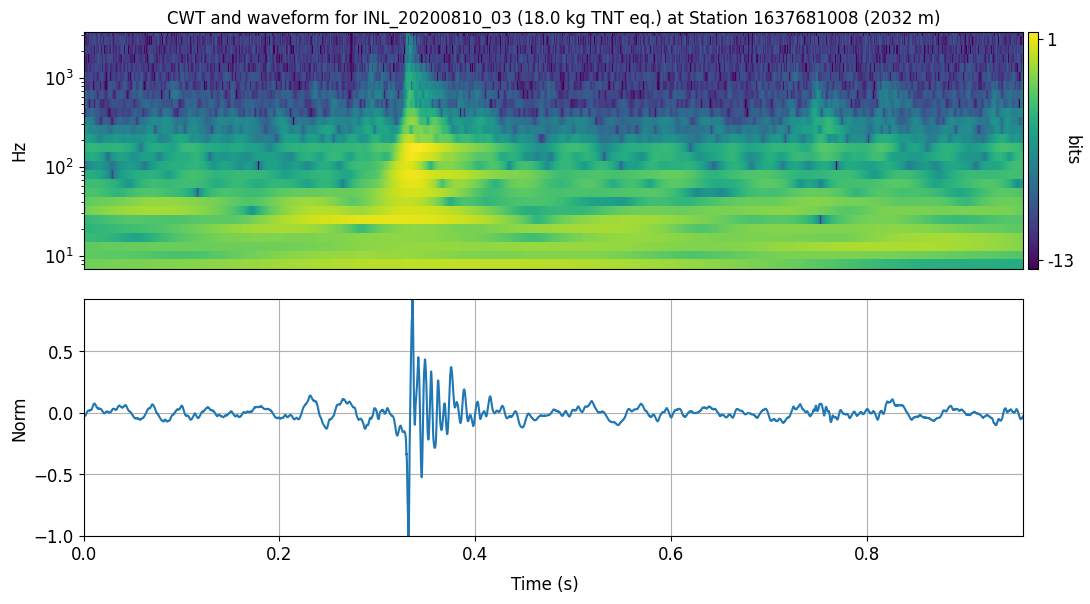

In [27]:
# loop through the rows
for row_index in example_df.index:
    # grab the values from the relevant metadata fields
    event_name = example_df[ds_labels.event_name][row_index]
    source_yield = example_df[ds_labels.source_yield_kg][row_index]
    dist_m = example_df[ds_labels.distance_from_explosion_m][row_index]
    station_id = example_df[ds_labels.smartphone_id][row_index]
    # standardize the time array for cleaner visualization
    relative_time = example_df[ds_labels.microphone_time_s][row_index] - example_df[ds_labels.microphone_time_s][row_index][0]
    # demean and normalize the audio data for cleaner visualization
    audio_data = demean_norm(example_df[ds_labels.microphone_data][row_index])
    # calculate and plot the continuous wavelet transform using the quantum_inferno module
    cwt, cwt_bits, time_s, frequency_cwt_hz = cwt_chirp_from_sig(
        sig_wf=audio_data,
        frequency_sample_rate_hz=example_df[ds_labels.microphone_sample_rate_hz][row_index],
        band_order_nth=3,
        cwt_type="conv"
    )
    tfr_title = f"CWT and waveform for {event_name} ({source_yield} kg TNT eq.)"
    _ = plot_wf_mesh_vert_example(
        station_id=f"{station_id} ({round(dist_m)} m)",
        wf_panel_a_sig=audio_data,
        wf_panel_a_time=relative_time,
        mesh_time=time_s,
        mesh_frequency=frequency_cwt_hz,
        mesh_panel_b_tfr=cwt_bits,
        figure_title=tfr_title,
    )

## Section 4: Saving SHAReD Data

We can save a subset of the data to a new pickle (.pkl) file. This can be useful in some cases as the full dataset is quite large and may not be needed for all applications.

We can save any subset (data from detonations > 10 kg TNT eq., data from only a single station, etc.), but we'll stick with our example subset of data from a single event and station. For this example, we'll save a pickle file of data from our example event and station (event ID number 26, station ID 1637681008), but this can be modified by simply changing the values of `event_id_number_to_save` and `station_id_to_save`.

In [28]:
event_id_to_save: int = 26
station_id_to_save: str = "1637681008"
# check if the event id is in the dataset
event_ids = np.unique(shared_ds[ds_labels.event_id_number])
if event_id_to_save in event_ids:
    subset_to_save = shared_ds[shared_ds[ds_labels.event_id_number] == event_id_to_save]
    # check if the station id is in the subset
    station_ids = np.unique(subset_to_save[ds_labels.smartphone_id])
    if station_id_to_save in station_ids:
        subset_to_save = subset_to_save[subset_to_save[ds_labels.smartphone_id] == station_id_to_save]
        output_filename = f"SHAReD_event{event_id_to_save}_{station_id_to_save}.pkl"
        output_path = os.path.join(CURRENT_DIRECTORY, output_filename)
        subset_to_save.to_pickle(output_path)
        print(f"Subset of SHAReD containing event {event_id_to_save} data from station {station_id_to_save} saved to: {output_path}")
    else:
        print(f"Station {station_id_to_save} not found in data from event number {event_id_to_save}. No data saved.")
else:
    print(f"Data from event number {event_id_to_save} not found in dataset. No data saved.")


Subset of SHAReD containing event 26 data from station 1637681008 saved to: /Users/tyler/IdeaProjects/UH_Soundscapes/notebooks/SHAReD_event26_1637681008.pkl


This concludes the tutorial. For more details on SHAReD, see the references listed at the beginning of the tutorial.